# Title


## Introduction

---

intro text here

---

--

**Question we're asking**

--

## Preliminary exploratory data analysis

#### Loading and Cleaning the dataset

In [35]:
library(tidyverse)
# library(magrittr)
# library(janitor)
library(dplyr)

In [44]:
adult_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_data_path <- "adult.csv"
# testing data url 
adult_test_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
download.file(adult_data_url, destfile = adult_data_path)
download.file(adult_test_url, destfile = "adult.test.csv")
adult_data <- read_csv(adult_data_path, col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"))
head(adult_data)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital-status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [58]:
# Start by using "glimpse" to view the column names and data pertaining to the columns
glimpse(adult_data)

Rows: 32,561
Columns: 15
$ age              <dbl> 39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, 30, 23, 3…
$ workclass        <chr> "State-gov", "Self-emp-not-inc", "Private", "Private"…
$ fnlwgt           <dbl> 77516, 83311, 215646, 234721, 338409, 284582, 160187,…
$ education        <chr> "Bachelors", "Bachelors", "HS-grad", "11th", "Bachelo…
$ `education-num`  <dbl> 13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, 13, 12, 1…
$ `marital-status` <chr> "Never-married", "Married-civ-spouse", "Divorced", "M…
$ occupation       <chr> "Adm-clerical", "Exec-managerial", "Handlers-cleaners…
$ relationship     <chr> "Not-in-family", "Husband", "Not-in-family", "Husband…
$ race             <chr> "White", "White", "White", "Black", "Black", "White",…
$ sex              <chr> "Male", "Male", "Male", "Male", "Female", "Female", "…
$ `capital-gain`   <dbl> 2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0, 0, 0, 0…
$ `capital-loss`   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `hours-per-we

In [59]:
# number of NA Values
sum(is.na(adult_data))

[1] 0

In [60]:
# converting vectors to factors
# known factors
# - workclass
# - education
# - marital-status
# - occupation
# - relationship
# - race
# - sex
# - native-country

adult_data <- adult_data |>
    rowwise() |>
    mutate(workclass = as_factor(workclass),
           education = as_factor(education),
           marital_status = as_factor(`marital-status`), # changing names for convienience 
           occupation = as_factor(occupation),
           relationship = as_factor(relationship),
           race = as_factor(race),
           sex = as_factor(sex),
           native_country = as_factor(`native-country`)) |>
    select(-`marital-status`,-`native-country`)


In [61]:
adult_data |>
    select(X15) |>
    unique()

X15
<chr>
<=50K
>50K


In [62]:
# there are only two values in this column we can make this a factor as well
# this column is how we will do binary classification
adult_data <- adult_data |>
    mutate(income=as_factor(X15)) |>
    select(-X15)
head(adult_data)

age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,marital_status,native_country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,Never-married,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,Married-civ-spouse,United-States,<=50K
38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Divorced,United-States,<=50K
53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,Married-civ-spouse,United-States,<=50K
28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,Married-civ-spouse,Cuba,<=50K
37,Private,284582,Masters,14,Exec-managerial,Wife,White,Female,0,0,40,Married-civ-spouse,United-States,<=50K


In [80]:
# lets see our predictor class distribution
adult_data |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data) * 100,
        ) |>
    arrange(desc(percentage))

# lets see the age distribution
mean(adult_data$age, na.RM=TRUE)
median(adult_data$age, na.RM=TRUE)

# lets see the native-country distribution
adult_data |>
    group_by(native_country) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data) * 100,
        ) |>
    arrange(desc(percentage)) |>
    head()

adult_data_above50k <- filter(adult_data, income==">50K")

# distribution of countries in the data with income above 50k
adult_data_above50k |>
    group_by(native_country) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data_above50k) * 100,
        ) |>
    arrange(desc(percentage)) |>
    head()

# distribution of income in the data from united-states
adult_data |>
    filter(native_country=="United-States") |>
    group_by(income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data) * 100,
        ) |>
    arrange(desc(percentage))
# maximum data is from United-states

income,count,percentage
<fct>,<int>,<dbl>
<=50K,24720,75.91904
>50K,7841,24.08096


[1] 38.58165

[1] 37

native_country,count,percentage
<fct>,<int>,<dbl>
United-States,29170,89.5857007
Mexico,643,1.9747551
?,583,1.7904856
Philippines,198,0.6080894
Germany,137,0.4207487
Canada,121,0.3716102


native_country,count,percentage
<fct>,<int>,<dbl>
United-States,7171,91.4551715
?,146,1.8620074
Philippines,61,0.7779620
Germany,44,0.5611529
India,40,0.5101390
Canada,39,0.4973855


income,count,percentage
<fct>,<int>,<dbl>
<=50K,21999,67.56242
>50K,7171,22.02328


we can see that we have way more data for less than 50k prediction than 


we can see that the age distribution is pretty similar, we have data that is distributed almost equally over 20-50...

the data distribution of native_country is not at all equal, most recorded data is from United-States... this also means that using native_country as a predictor class would not be usefull since most of our data is from United-States

and from the third table we see that for the class above 50k 91% of the data is from United-States...  but also looking at the fourth table we see that the distribution of the two classes (>50k and <=50k) amongst United-States is similar to the whole Data set, **hence native_country is not a usefull variable**



In [83]:
adult_data |>
    group_by(sex) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data) * 100,
        ) |>
    arrange(desc(percentage))

adult_data |>
    group_by(sex, income) |>
    summarize(
        count = n(),
        percentage = n() / nrow(adult_data) * 100,
        ) |>
    arrange(desc(percentage))

sex,count,percentage
<fct>,<int>,<dbl>
Male,21790,66.92055
Female,10771,33.07945


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,income,count,percentage
<fct>,<fct>,<int>,<dbl>
Male,<=50K,15128,46.460490
Female,<=50K,9592,29.458555
Male,>50K,6662,20.460060
Female,>50K,1179,3.620896


Using these tables we notice that the distribution of the sex variable seems usable as a predictor variable, as the ratios are normal 


Till now the variables that are usable for classification are :-
 - sex
 - age
 - hours-per-week
 - race
 - occupation
 - education
 - workclass
 - education-num

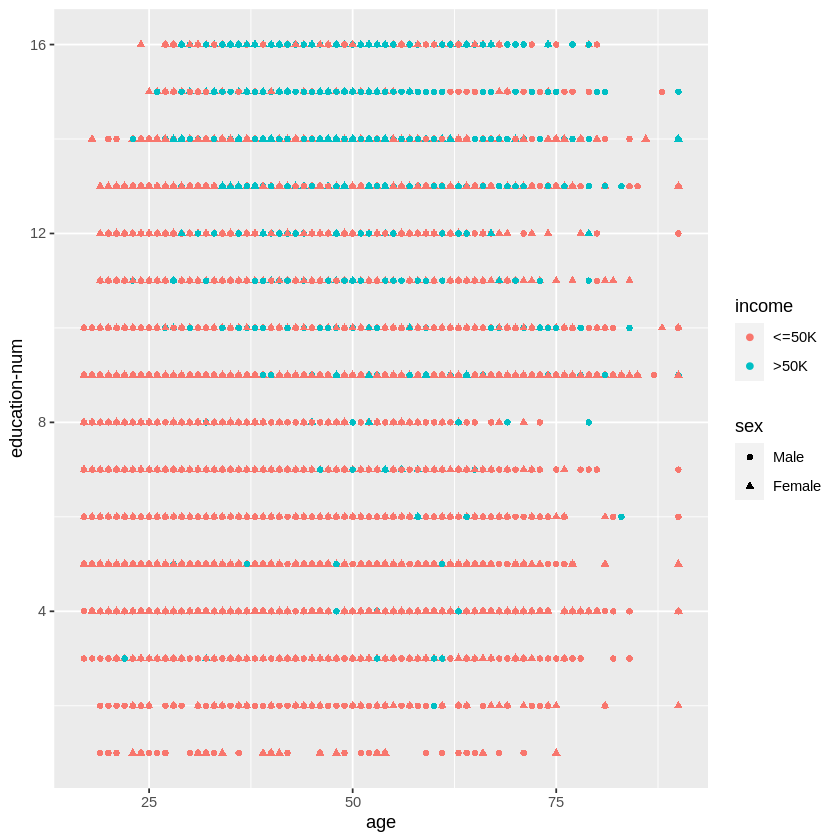

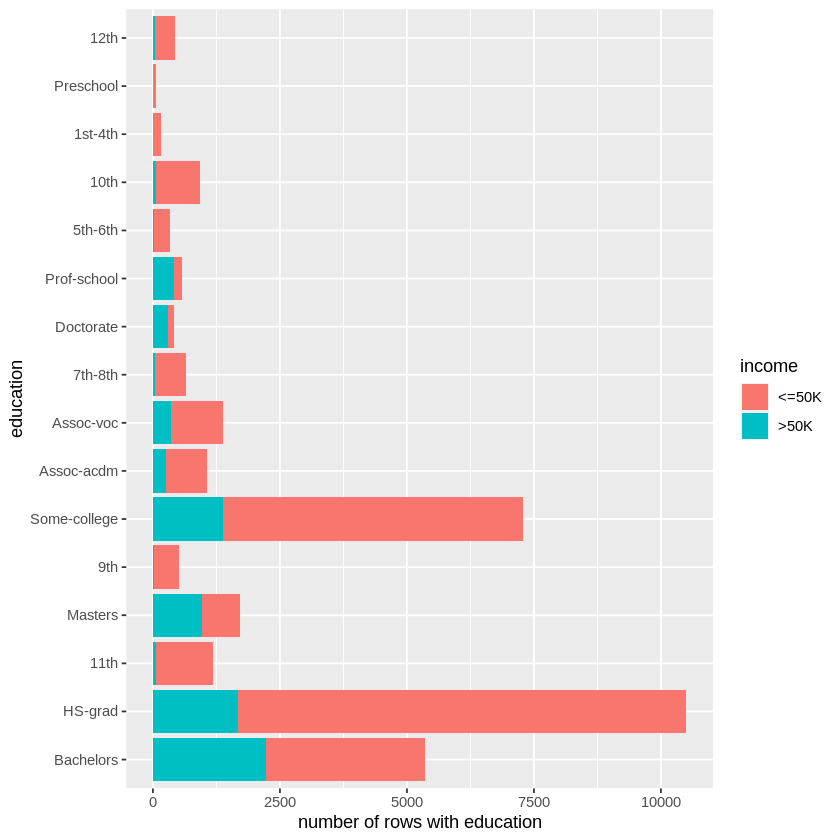

In [93]:
ggplot(adult_data, aes(x=`age`, y=`education-num`, color=income, shape=sex)) +
    geom_point()

adult_data_ed_plot <- adult_data |>
    mutate(n = 1)

ggplot(adult_data_ed_plot, aes(x=n, y=`education`, fill=income, shape=sex)) +
    geom_bar(stat="identity") +
    labs(x="number of rows with education")



From the above graphs we can see that in the middle age ranges we find the most records with >50k Income...

and as the education-num increases the income class as well...

education and education-num are very similar variables from their distribution, so we can use education-num as a factor instead of education

## Methods


## Expected outcomes and significance